<a href="https://colab.research.google.com/github/fabiorfc/Epidemiologia-Matematica/blob/master/Panorama_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estrutura do Notebook** (Construção em andamento)

1. Leitura e exploração da base
2. Tratamento e preparação dos dados
3. Cálculo das estatísticas descritivas
4. Comparação das cidades

\

A base oficial está em [https://covid.saude.gov.br/](https://covid.saude.gov.br/).

___
# 1 - Leitura e exploração da base

## 1.1 - Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def estatisticas_epidemiologicas(data_frame, obitos_acumulados, casos_acumulados, populacao):
      novo_data_frame = data_frame.copy()
      novo_data_frame['prevalencia'] = novo_data_frame[casos_acumulados]/populacao * 100000
      novo_data_frame['letalidade']  = novo_data_frame[obitos_acumulados]/novo_data_frame[casos_acumulados]
      return novo_data_frame

## 1.2 - Leitura dos dados

In [3]:
dados = pd.read_csv('HIST_PAINEL_COVIDBR_04nov2020.csv', sep = ';')
dados.head(2)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN


## 1.3 - Exploração dos dados

In [4]:
print(f' --- Hoje, dia {datetime.now().day}/{datetime.now().month}/{datetime.now().year}')
print(f' --- A tabela de dados do COVID possui:')
print(f' ------ {len(dados)} linhas')
print(f' ------ {dados.shape[1]} colunas')

 --- Hoje, dia 5/11/2020
 --- A tabela de dados do COVID possui:
 ------ 1253905 linhas
 ------ 17 colunas


In [5]:
pd.DataFrame({'Regioes verificadas na base' :dados['regiao'].unique()})

,Regioes verificadas na base
0,Brasil
1,Norte
2,Nordeste
3,Sudeste
4,Sul
5,Centro-Oeste


In [6]:
print(f'Estados verificados na base:')
dados['estado'].unique()

Estados verificados na base:


array([nan, 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE',
       'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR',
       'SC', 'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

____
# 2 - Tratamento e preparação dos dados

## 2.1 - Revisão da literatura e cálculo das estatísticas epidemiológicas




In [7]:
# Conversao do campo de data
dados['data'] = pd.to_datetime(dados['data'])

# Somando os dados do Brasil
brasil = dados.copy()
brasil = brasil.groupby('data').sum()
brasil.reset_index(inplace = True)

# Separando os dados do estado de SP
estado_SP = dados.query("estado == 'SP'")
estado_SP = estado_SP.groupby('data').sum()
estado_SP.reset_index(inplace = True)

# Separando os dados das cidades de interesse
assis     = dados.query("municipio == 'Assis'")
marilia   = dados.query("municipio == 'Marília'")
sao_paulo = dados.query("municipio == 'São Paulo'")

# Selecao das colunas que serão utilizadas
colunas_de_interesse = ['data','semanaEpi','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']

# Filtragem dos dados
brasil    = brasil[colunas_de_interesse]
estado_SP = estado_SP[colunas_de_interesse]
assis     = assis[colunas_de_interesse]
marilia   = marilia[colunas_de_interesse]
sao_paulo = sao_paulo[colunas_de_interesse]

# Tratamento das tabelas
brasil.reset_index(inplace = True, drop = True)
estado_SP.reset_index(inplace = True, drop = True)
assis.reset_index(inplace = True, drop = True)
marilia.reset_index(inplace = True, drop = True)
sao_paulo.reset_index(inplace = True, drop = True)

# Extraindo o tamanho populacional de cada Cidade, Estado ou Pais
populacao_assis     = dados.query("municipio == 'Assis'")['populacaoTCU2019'].values[0]
populacao_marilia   = dados.query("municipio == 'Marília'")['populacaoTCU2019'].values[0]
populacao_sao_paulo = dados.query("municipio == 'São Paulo'")['populacaoTCU2019'].values[0]
populacao_SP        = dados.query("estado == 'SP'")[dados.query("estado == 'SP'")['codmun'].isna()]['populacaoTCU2019'].values[0]
populacao_BR        = dados.query("regiao == 'Brasil'")['populacaoTCU2019'].values[0]

print(f'---- Verificando as dimensões das populações')
print(f'-- Assis: {populacao_assis:.0f}')
print(f'-- Marília: {populacao_marilia:.0f}')
print(f'-- São Paulo: {populacao_sao_paulo:.0f}')
print(f'-- SP: {populacao_SP:.0f}')
print(f'-- Brasil: {populacao_BR:.0f}')

# Cálculo das estatísticas epidemiológicas
brasil    = estatisticas_epidemiologicas(brasil   , 'obitosAcumulado', 'casosAcumulado', populacao_BR)
estado_SP = estatisticas_epidemiologicas(estado_SP, 'obitosAcumulado', 'casosAcumulado', populacao_SP)
assis     = estatisticas_epidemiologicas(assis    , 'obitosAcumulado', 'casosAcumulado', populacao_assis)
marilia   = estatisticas_epidemiologicas(marilia  , 'obitosAcumulado', 'casosAcumulado', populacao_marilia)
sao_paulo = estatisticas_epidemiologicas(sao_paulo, 'obitosAcumulado', 'casosAcumulado', populacao_sao_paulo)

---- Verificando as dimensões das populações
-- Assis: 104386
-- Marília: 238882
-- São Paulo: 12252023
-- SP: 45919049
-- Brasil: 210147125


**Revisão dos dados das cidades**

In [8]:
# Verificando se existe duplicidade dos dados
verificacao_assis     = len(assis['data'].unique())     == len(assis)
verificacao_marilia   = len(marilia['data'].unique())   == len(marilia)
verificacao_sao_paulo = len(sao_paulo['data'].unique()) == len(sao_paulo)

# Validacao dos dados
print('---- Verificando duplicidade nos dados da cidade')
if not verificacao_assis:
    print('-- Existe duplicação nos dados de Assis')
elif not verificacao_marilia:
    print('-- Existe duplicação nos dados de Marília')
elif not verificacao_sao_paulo:
    print('-- Existe duplicação nos dados de São Paulo')
else:
    print('-- Tudo Ok para os dados das cidades')

---- Verificando duplicidade nos dados da cidade
-- Tudo Ok para os dados das cidades


**Revisão dos dados do estado de SP e Brasil**

In [9]:
# Verificando se existe duplicidade nos dados de SP e Brasil
verificacao_brasil    = len(brasil['data'].unique())     == len(brasil)
verificacao_estado_SP = len(estado_SP['data'].unique())  == len(estado_SP)

# Verificacao dos dados
print('---- Verificando duplicidade nos dados da cidade')
if not verificacao_estado_SP:
    print('-- Existe duplicação nos dados de São Paulo')
else:
    print('-- Tudo Ok para os dados de São Paulo')

if not verificacao_brasil:
    print('-- Existe duplicação nos dados do Brasil')
else:
    print('-- Tudo Ok para os dados do Brasil')

---- Verificando duplicidade nos dados da cidade
-- Tudo Ok para os dados de São Paulo
-- Tudo Ok para os dados do Brasil


# 2.2 - Comparação das Cidades

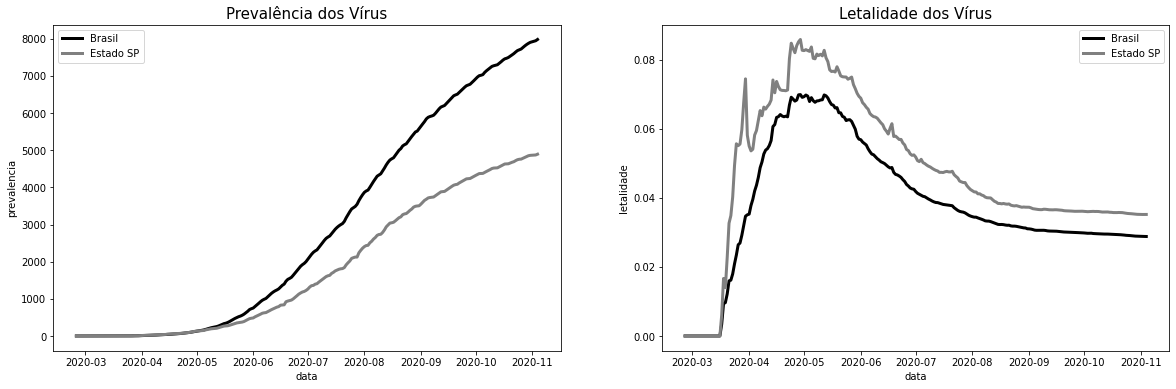

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (20,6))

sns.lineplot(data = brasil    , y = 'prevalencia', x = 'data', label = 'Brasil'   , linewidth = 3, ax = axs[0], color = 'black')
sns.lineplot(data = estado_SP , y = 'prevalencia', x = 'data', label = 'Estado SP', linewidth = 3, ax = axs[0], color = 'grey')

sns.lineplot(data = brasil   , y = 'letalidade', x = 'data', label = 'Brasil'   , linewidth = 3, ax = axs[1], color = 'black')
sns.lineplot(data = estado_SP, y = 'letalidade', x = 'data', label = 'Estado SP', linewidth = 3, ax = axs[1], color = 'grey')

axs[0].set_title('Prevalência dos Vírus', fontsize = 15)
axs[1].set_title('Letalidade dos Vírus', fontsize = 15)
plt.show()

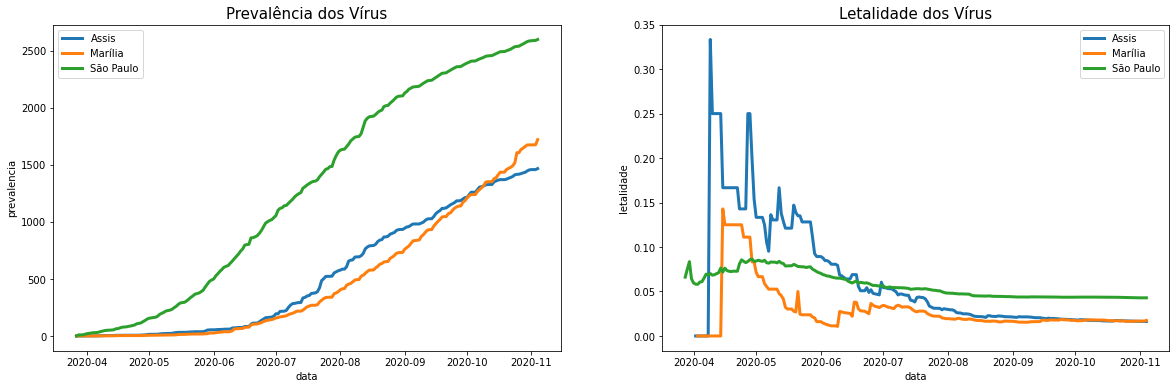

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (20,6))

sns.lineplot(data = assis     , y = 'prevalencia', x = 'data', label = 'Assis'    , linewidth = 3, ax = axs[0])
sns.lineplot(data = marilia   , y = 'prevalencia', x = 'data', label = 'Marília'  , linewidth = 3, ax = axs[0])
sns.lineplot(data = sao_paulo , y = 'prevalencia', x = 'data', label = 'São Paulo', linewidth = 3, ax = axs[0])

sns.lineplot(data = assis    , y = 'letalidade', x = 'data', label = 'Assis'    , linewidth = 3, ax = axs[1])
sns.lineplot(data = marilia  , y = 'letalidade', x = 'data', label = 'Marília'  , linewidth = 3, ax = axs[1])
sns.lineplot(data = sao_paulo, y = 'letalidade', x = 'data', label = 'São Paulo', linewidth = 3, ax = axs[1])

axs[0].set_title('Prevalência dos Vírus', fontsize = 15)
axs[1].set_title('Letalidade dos Vírus', fontsize = 15)
plt.show()

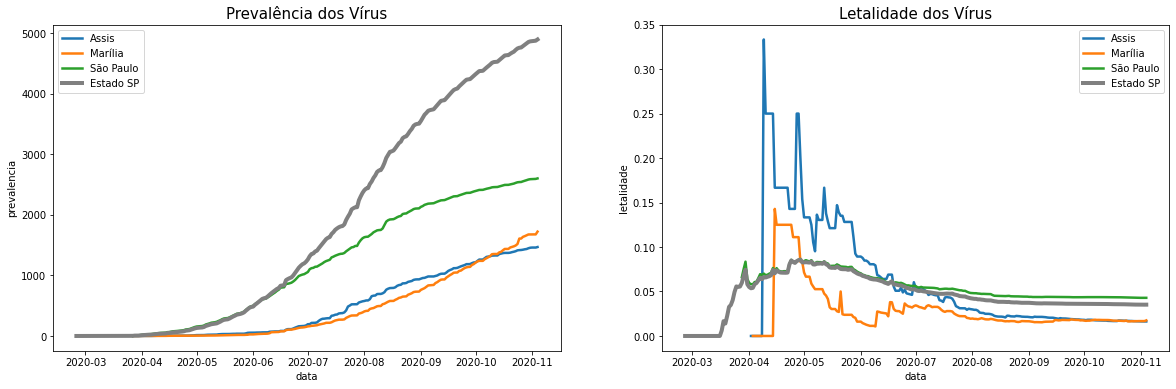

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (20,6))

sns.lineplot(data = assis     , y = 'prevalencia', x = 'data', label = 'Assis'    , linewidth = 2.5, ax = axs[0])
sns.lineplot(data = marilia   , y = 'prevalencia', x = 'data', label = 'Marília'  , linewidth = 2.5, ax = axs[0])
sns.lineplot(data = sao_paulo , y = 'prevalencia', x = 'data', label = 'São Paulo', linewidth = 2.5, ax = axs[0])
sns.lineplot(data = estado_SP , y = 'prevalencia', x = 'data', label = 'Estado SP', linewidth = 4.0, ax = axs[0], color = 'grey')

sns.lineplot(data = assis    , y = 'letalidade', x = 'data', label = 'Assis'    , linewidth = 2.5, ax = axs[1])
sns.lineplot(data = marilia  , y = 'letalidade', x = 'data', label = 'Marília'  , linewidth = 2.5, ax = axs[1])
sns.lineplot(data = sao_paulo, y = 'letalidade', x = 'data', label = 'São Paulo', linewidth = 2.5, ax = axs[1])
sns.lineplot(data = estado_SP, y = 'letalidade', x = 'data', label = 'Estado SP', linewidth = 4.0, ax = axs[1], color = 'grey')

axs[0].set_title('Prevalência dos Vírus', fontsize = 15)
axs[1].set_title('Letalidade dos Vírus', fontsize = 15)
plt.show()

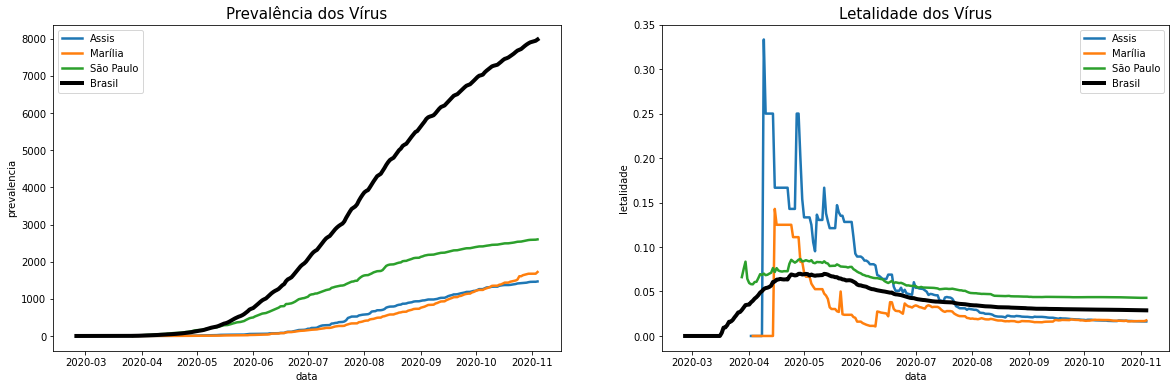

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (20,6))

sns.lineplot(data = assis     , y = 'prevalencia', x = 'data', label = 'Assis'    , linewidth = 2.5, ax = axs[0])
sns.lineplot(data = marilia   , y = 'prevalencia', x = 'data', label = 'Marília'  , linewidth = 2.5, ax = axs[0])
sns.lineplot(data = sao_paulo , y = 'prevalencia', x = 'data', label = 'São Paulo', linewidth = 2.5, ax = axs[0])
sns.lineplot(data = brasil    , y = 'prevalencia', x = 'data', label = 'Brasil'   , linewidth = 4.0, ax = axs[0], color = 'black')

sns.lineplot(data = assis    , y = 'letalidade', x = 'data', label = 'Assis'    , linewidth = 2.5, ax = axs[1])
sns.lineplot(data = marilia  , y = 'letalidade', x = 'data', label = 'Marília'  , linewidth = 2.5, ax = axs[1])
sns.lineplot(data = sao_paulo, y = 'letalidade', x = 'data', label = 'São Paulo', linewidth = 2.5, ax = axs[1])
sns.lineplot(data = brasil   , y = 'letalidade', x = 'data', label = 'Brasil'  , linewidth = 4.0, ax = axs[1], color = 'black')

axs[0].set_title('Prevalência dos Vírus', fontsize = 15)
axs[1].set_title('Letalidade dos Vírus', fontsize = 15)
plt.show()